### 2.  Data Understanding
Laddar datasetet

In [85]:
import pandas as pd
import numpy as np

from pandas import ExcelWriter
from pandas import ExcelFile

import seaborn as sns
import matplotlib.pyplot as plt
 
df = pd.read_excel('data/dataIteration1.xlsx')
df


,Utfall,Antal_KF,Kund_ID,Anvandare_ID,Personnr,Postadress,Postadress_ort,Postadress_postnr
0,Upptaget,7,384033,99,19840523,Skedviksvägen 50 lgh 1203,Årsta,12054
1,Upptaget,17,394256,99,19750117,Hjalmar Selandersgatan 1 A lgh 1202,Göteborg,41674
2,Upptaget,17,394496,99,19850809,Liedstrandsgatan 10 lgh 1704,Göteborg,41658
3,Upptaget,11,394626,99,19470630,Persgatan 14 C lgh 1201,Göteborg,41658
4,Upptaget,12,395104,99,19840305,Spångavägen 50 lgh 1201,Bromma,16875
5,Upptaget,10,395445,99,19520327,Stopvägen 89 lgh 1201,Bromma,16836
6,Upptaget,14,395253,99,19860402,Tranebergsvägen 40 lgh 1102,Bromma,16744
7,Upptaget,8,394977,99,19910702,Herman Ygbergs väg 2 lgh 1202,Bromma,16761
8,Upptaget,8,395754,99,19680905,Tunnlandsvägen 59 lgh 1202,Bromma,16836
9,Upptaget,11,395400,99,19610729,Gustavslundsvägen 149 E lgh 1104,Bromma,16751


In [86]:
# Check for missing values
df.isnull().mean().sort_values(ascending=False) * 100


Personnr             2.436903
Postadress_postnr    0.022889
Postadress           0.019837
Postadress_ort       0.018311
Anvandare_ID         0.000000
Kund_ID              0.000000
Antal_KF             0.000000
Utfall               0.000000
dtype: float64

### 3.  Data Preparation
Transformation av datan

In [87]:
# Rensa personnr
df.Personnr = df.Personnr.map(lambda x: (str(x)[0:10]))
df.Personnr = pd.to_numeric(df.Personnr, errors='coerce')

# Skapa attribut för ålder
df["Alder"] = df.Personnr.map(lambda x: (2019-float(str(x)[0:4])))


df

,Utfall,Antal_KF,Kund_ID,Anvandare_ID,Personnr,Postadress,Postadress_ort,Postadress_postnr,Alder
0,Upptaget,7,384033,99,19840523.0,Skedviksvägen 50 lgh 1203,Årsta,12054,35.0
1,Upptaget,17,394256,99,19750117.0,Hjalmar Selandersgatan 1 A lgh 1202,Göteborg,41674,44.0
2,Upptaget,17,394496,99,19850809.0,Liedstrandsgatan 10 lgh 1704,Göteborg,41658,34.0
3,Upptaget,11,394626,99,19470630.0,Persgatan 14 C lgh 1201,Göteborg,41658,72.0
4,Upptaget,12,395104,99,19840305.0,Spångavägen 50 lgh 1201,Bromma,16875,35.0
5,Upptaget,10,395445,99,19520327.0,Stopvägen 89 lgh 1201,Bromma,16836,67.0
6,Upptaget,14,395253,99,19860402.0,Tranebergsvägen 40 lgh 1102,Bromma,16744,33.0
7,Upptaget,8,394977,99,19910702.0,Herman Ygbergs väg 2 lgh 1202,Bromma,16761,28.0
8,Upptaget,8,395754,99,19680905.0,Tunnlandsvägen 59 lgh 1202,Bromma,16836,51.0
9,Upptaget,11,395400,99,19610729.0,Gustavslundsvägen 149 E lgh 1104,Bromma,16751,58.0


### 4. Modelling
Data mining modellen. 

I detta fall visualisera all data i pie charts, histogram och scatter plots.

68.2974896379135


Uppsala                8644
Stockholm              6236
Bromma                 4243
Norrköping             4153
Täby                   3192
Lidingö                2729
Upplands Väsby         2557
Göteborg               2458
Västerås               2426
Solna                  2235
Sundbyberg             2102
Jönköping              1905
Vallentuna             1733
Märsta                 1677
Årsta                  1560
Järfälla               1500
Kista                  1266
Gävle                   989
Saltsjö-Boo             931
Bandhagen               831
Kungsbacka              807
Johanneshov             798
Tullinge                722
Sigtuna                 719
Hyltebruk               676
Enköping                636
Tumba                   633
Skarpnäck               629
Farsta                  443
Enskede                 418
                       ... 
Uttran                   19
Halmstad                 13
TÄBY                     13
Limhamn                  13
Norsholm            

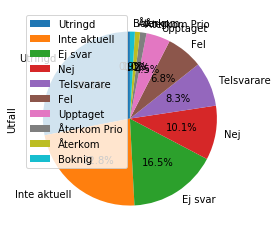

In [98]:
df2 = df[['Utfall','Alder']]
df2['Utfall'].value_counts()

print("HÖGA FUCKAR UPP")
print(df2['Alder'].mean())

utfallPie = pd.DataFrame({
    'label': ["Utringd", "Inte aktuell", "Ej svar", "Nej", "Telsvarare", "Fel", "Upptaget", "Återkom Prio", "Återkom", "Boknig"],
    'Utfall': df2['Utfall'].value_counts(),
})

plt.show()
utfallPie.plot(kind='pie', y='Utfall', autopct='%1.1f%%', startangle=90, labels=utfallPie['label'])


df['Postadress_ort'].value_counts()


#df2 = df2.groupby('Alder')['Utfall'].apply(list)

#type(df2)
# gca stands for 'get current axis'
#ax = plt.gca()

#df.plot(kind='line',x='Utfall',y='Alder',ax=ax)
#df.plot(kind='line',x='name',y='Alder', color='red', ax=ax)

#plt.show()